<a href="https://colab.research.google.com/github/largereptile/csgostats/blob/main/CS_GO_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usage + Setup

So I hear you want to see some csgo statistics

1. Click the "make a copy to my drive" button then open up that copy instead of the public one


  ![](https://cdn.discordapp.com/attachments/310499703760486401/842034116622024765/unknown.png)

2. Next make sure you have a .json file of the thing (guide on how to get one coming later)

3. Click the "files" button on the sidebar and upload your json file


![](https://media.discordapp.net/attachments/310499703760486401/842033614316765254/unknown.png?width=306&height=222)

![](https://media.discordapp.net/attachments/310499703760486401/842033653244362752/unknown.png?width=192&height=105)

4. Go through and click the play buttons next to each code block as the instructions say (they appear when you hover over it)

In [45]:
#@title Setup Box - Run this one before continuing {display-mode: "form"}

import datetime
import json
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from matplotlib.font_manager import FontProperties

#@markdown Input the filename of the .json you uploaded.
in_file = 'out.json'  #@param {type: "string"}

# General Stats

In [46]:
#@title Current Display Names of Players {display-mode: "form"}
#@markdown Leave rival empty to just see your own stats

ME = "barold" #@param {type: "string"}
RIVAL = "" #@param {type: "string"}

with open(in_file, "r", encoding="utf8") as f:
    data = json.load(f)


def contains_rival(match):
    return RIVAL in list(map(lambda x: x["name"], match["myTeam"]["players"]))


def total_wins(matches):
    return len(list(filter(lambda x: x["myTeam"]["won"], matches)))


def total_draws(matches):
    return len(list(filter(lambda x: x["myTeam"]["draw"], matches)))


def top_frags(matches, name):
    return len(list(filter(lambda x: max(list(map(lambda y: y["kills"], x["myTeam"]["players"]))) ==
                              list(filter(lambda y: y["name"] == name, x["myTeam"]["players"]))[0][
                                  "kills"], matches)))


def top_scores(matches, name):
    return len(list(filter(lambda x: x["myTeam"]["players"][0]["name"] == name, matches)))


def total_mvps(matches, name):
    return sum(
        list(map(lambda x: list(filter(lambda y: y["name"] == name, x["myTeam"]["players"]))[0]["mvps"], matches)))


def average_leaderboard_pos(matches, name):
    return sum(list(map(lambda x: list(map(lambda y: y["name"], x["myTeam"]["players"])).index(name), matches))) / len(matches)


def total_kills(matches, name):
    return sum(
        list(map(lambda x: list(filter(lambda y: y["name"] == name, x["myTeam"]["players"]))[0]["kills"], matches)))


def total_assists(matches, name):
    return sum(
        list(map(lambda x: list(filter(lambda y: y["name"] == name, x["myTeam"]["players"]))[0]["assists"], matches)))


def total_deaths(matches, name):
    return sum(
        list(map(lambda x: list(filter(lambda y: y["name"] == name, x["myTeam"]["players"]))[0]["deaths"], matches)))


def playing_time(matches):
    return sum(list(map(lambda x: x["duration"], matches)))


def waiting_time(matches):
    return sum(list(map(lambda x: x["waitTime"], matches)))


if RIVAL:
    data = list(filter(lambda k: contains_rival(k), data))

total_matches = len(data)
wins = total_wins(data)
draws = total_draws(data)
total_top_frags = top_frags(data, ME)
total_top_scores = top_scores(data, ME)
mvps = total_mvps(data, ME)
average_leaderboard_position = average_leaderboard_pos(data, ME)

kills = total_kills(data, ME)
assists = total_assists(data, ME)
deaths = total_deaths(data, ME)

total_playing_time = playing_time(data)
total_waiting_time = waiting_time(data)

if not RIVAL:
    output_string = f"""
Stats for {ME}
-----------------------------------------

Totals:
--------
Total Matches: {total_matches}
Total Wins: {wins}
Total Draws: {draws}
No. Top Frags: {total_top_frags}
No. Top Score: {total_top_scores}
No. MVPs: {mvps}
Total K/A/D: {kills}/{assists}/{deaths}
Total In-game Time: {datetime.timedelta(seconds=total_playing_time)}
Total Queueing Time: {datetime.timedelta(seconds=total_waiting_time)}

Averages:
--------
Kills per Game: {round(kills / total_matches, 2)}
Assists per Game: {round(assists / total_matches, 2)}
Deaths per Game: {round(deaths / total_matches, 2)}
K/D Ratio: {round(kills / deaths, 2)}
Kills + Assists/Death Ratio: {round((kills + assists) / deaths, 2)}
Avg. Leaderboard Position: {round(average_leaderboard_position, 2)}
    """
    print(output_string)
else:
    r_total_top_frags = top_frags(data, RIVAL)
    r_total_top_scores = top_scores(data, RIVAL)
    r_total_mvps = total_mvps(data, RIVAL)
    r_average_leaderboard_position = average_leaderboard_pos(data, RIVAL)

    r_total_kills = total_kills(data, RIVAL)
    r_total_assists = total_assists(data, RIVAL)
    r_total_deaths = total_deaths(data, RIVAL)

    avg_kill_difference = round((kills/total_matches) - (r_total_kills/total_matches), 2)
    akd_string = f"{ME} gets {avg_kill_difference} more kills than {RIVAL} per game" if avg_kill_difference > 0 else f"{RIVAL} gets {-avg_kill_difference} more kills than {ME} per game"

    avg_assist_difference = round((assists/total_matches) - (r_total_assists/total_matches), 2)
    aad_string = f"{ME} gets {avg_assist_difference} more assists than {RIVAL} per game" if avg_assist_difference > 0 else f"{RIVAL} gets {-avg_assist_difference} more assists than {ME} per game"

    avg_death_difference = round((deaths/total_matches) - (r_total_deaths/total_matches), 2)
    add_string = f"{ME} gets {avg_death_difference} more deaths than {RIVAL} per game" if avg_death_difference > 0 else f"{RIVAL} gets {-avg_death_difference} more deaths than {ME} per game"

    avg_mvp_difference = round((mvps/total_matches) - (r_total_mvps/total_matches), 2)
    amd_string = f"{ME} gets {avg_mvp_difference} more MVPs than {RIVAL} per game" if avg_mvp_difference > 0 else f"{RIVAL} gets {-avg_mvp_difference} more MVPs than {ME} per game"

    avg_leaderboard_difference = round(average_leaderboard_position - r_average_leaderboard_position, 2)
    all_string = f"{ME} is {-avg_leaderboard_difference} places higher than {RIVAL} per game" if avg_leaderboard_difference < 0 else f"{RIVAL} is {avg_leaderboard_difference} places higher than {ME} per game"

    output_string = f"""
Stats for {ME} with {RIVAL}
-----------------------------------------

Totals:
--------
Total Matches Together: {total_matches}
Total Wins: {wins}
Total Draws: {draws}

No. Top Frags: {total_top_frags} vs {r_total_top_frags}
No. Top Score: {total_top_scores} vs {r_total_top_scores}
No. MVPs: {mvps} vs {r_total_mvps}
Total K/A/D: {kills}/{assists}/{deaths} vs {r_total_kills}/{r_total_assists}/{r_total_deaths}

Total In-game Time: {datetime.timedelta(seconds=total_playing_time)}
Total Queueing Time: {datetime.timedelta(seconds=total_waiting_time)}

Averages:
--------
Average Kill Difference: {akd_string}
Average Assist Difference: {aad_string}
Average Death Difference: {add_string}
Average MVP Difference: {amd_string}
Average Leaderboard Difference: {all_string}

        """
    print(output_string)


Stats for barold
-----------------------------------------

Totals:
--------
Total Matches: 392
Total Wins: 178
Total Draws: 39
No. Top Frags: 37
No. Top Score: 34
No. MVPs: 764
Total K/A/D: 6011/1893/7609
Total In-game Time: 10 days, 1:33:40
Total Queueing Time: 5:40:28

Averages:
--------
Kills per Game: 15.33
Assists per Game: 4.83
Deaths per Game: 19.41
K/D Ratio: 0.79
Kills + Assists/Death Ratio: 1.04
Avg. Leaderboard Position: 2.4
    


# Map Playcount Graph

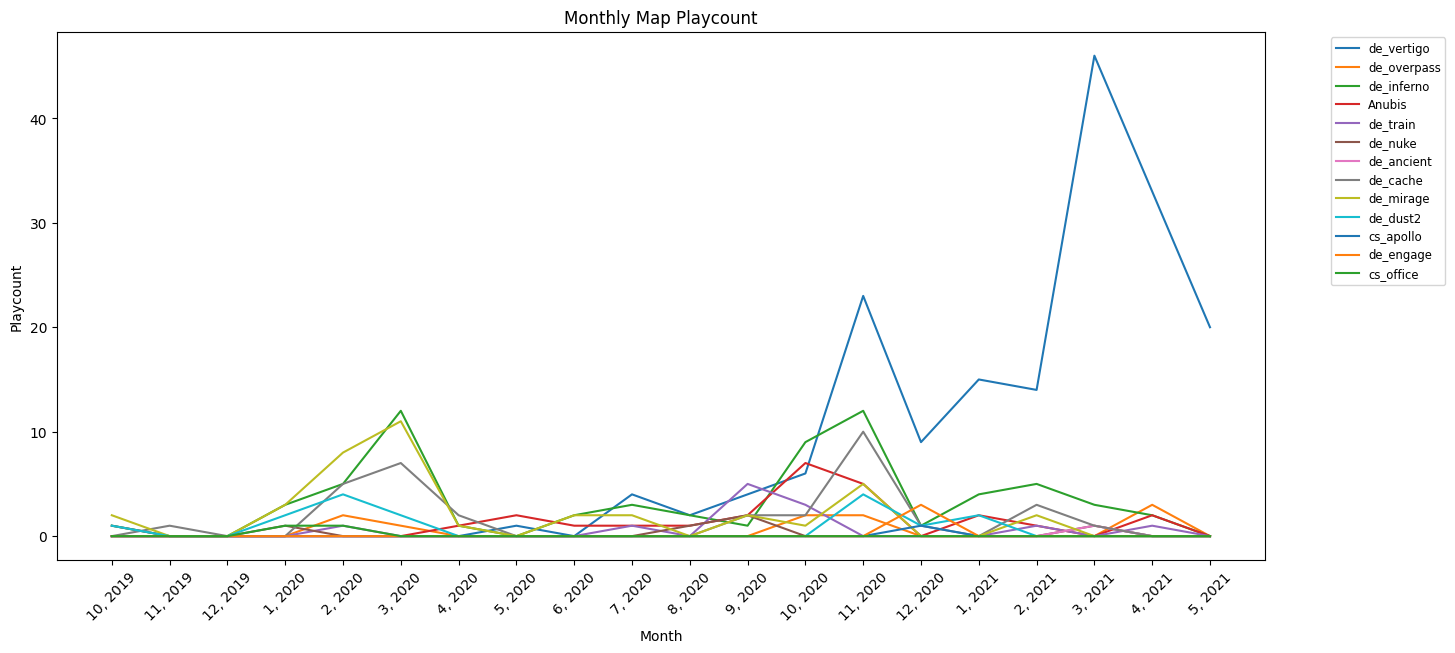

In [47]:
#@title Timeframe to Group Results By

timeframe = "m" #@param ["w", "m", "y"]

with open(in_file, "r", encoding="utf8") as f:
    data = json.load(f)


maps_over_time = {}

for match in data:
    timestamp = datetime.datetime.strptime(match["time"], "%a, %d %b %Y %H:%M:%S %Z")
    if timeframe == "m":
        period = (timestamp.month, timestamp.year)
    elif timeframe == "w":
        period = (timestamp.isocalendar()[1], timestamp.year)
    elif timeframe == "y":
        period = timestamp.year
    else:
        period = (timestamp.day, timestamp.month, timestamp.year)

    map_name = match["map"]

    if map_name not in maps_over_time.keys():
        maps_over_time[map_name] = {}
    if period not in maps_over_time[map_name].keys():
        maps_over_time[map_name][period] = 0

    maps_over_time[map_name][period] += 1

first_game = datetime.datetime.strptime(data[-1]["time"], "%a, %d %b %Y %H:%M:%S %Z")
last_game = datetime.datetime.strptime(data[0]["time"], "%a, %d %b %Y %H:%M:%S %Z")

if timeframe == "m":
    delta = relativedelta(months=+1)
elif timeframe == "w":
    delta = relativedelta(weeks=+1)
elif timeframe == "y":
    delta = relativedelta(years=+1)
else:
    delta = relativedelta(days=+1)

plt.figure(figsize=(1600/100, 700/100), dpi=100)
plt.xticks(rotation=45)
ax = plt.gca()
for map_name, periods in maps_over_time.items():
    current_game = first_game
    while current_game <= (last_game + delta):
        if timeframe == "m":
            current_period = (current_game.month, current_game.year)
        elif timeframe == "w":
            current_period = (current_game.isocalendar()[1], current_game.year)
        elif timeframe == "y":
            current_period = current_game.year
        else:
            current_period = (current_game.day, current_game.month, current_game.year)

        if current_period not in periods.keys():
            periods[current_period] = 0
        current_game += delta
    if timeframe == "m":
        period_times = [(datetime.datetime(year=k[1], month=k[0], day=1), v) for k, v in periods.items()]
        period_times.sort(key=lambda a: a[0])
        x_axis = list(map(lambda a: f"{a[0].month}, {a[0].year}", period_times))
        y_axis = list(map(lambda a: a[1], period_times))
        ax.set_xlabel("Month")
        ax.set_title("Monthly Map Playcount")
    elif timeframe == "w":
        period_times = [(datetime.datetime(year=k[1], month=1, day=1) + relativedelta(weeks=+k[0]), v) for k, v in periods.items()]
        period_times.sort(key=lambda a: a[0])
        x_axis = list(map(lambda a: f"{a[0].isocalendar()[1]}, {a[0].year}", period_times))
        y_axis = list(map(lambda a: a[1], period_times))
        ax.set_xlabel("Week")
        ax.set_title("Weekly Map Playcount")
    elif timeframe == "y":
        period_times = [(datetime.datetime(year=k, month=1, day=1), v) for k, v in periods.items()]
        period_times.sort(key=lambda a: a[0])
        x_axis = list(map(lambda a: f"{a[0].year}", period_times))
        y_axis = list(map(lambda a: a[1], period_times))
        ax.set_xlabel("Year")
        ax.set_title("Yearly Map Playcount")
    else:
        period_times = [(datetime.datetime(year=k[2], month=k[1], day=k[0]), v) for k, v in periods.items()]
        period_times.sort(key=lambda a: a[0])
        x_axis = list(map(lambda a: f"{a[0].day}/{a[0].month}/{a[0].year}", period_times))
        y_axis = list(map(lambda a: a[1], period_times))
        ax.set_xlabel("Day")
        ax.set_title("Daily Map Playcount")
    plt.plot(x_axis, y_axis, label=map_name)

fontP = FontProperties()
fontP.set_size('small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.subplots_adjust(right=0.88)
ax.set_ylabel("Playcount")
plt.show()